In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier


# Load data from CSV file
file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1balclean.xlsx'
data = pd.read_excel(file_path)
#data = pd.read_excel('c:\andre\consolidado.xlsx', sheet_name='Sheet1')

# Assuming the last column is the target/output column
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Load data from CSV file
#file_path = r'C:\Users\Andre\Downloads\DOUTORADO\consolidadof1.xlsx'
#data = pd.read_excel(file_path)

# Assuming the last column is the target/output column
#X2 = data.iloc[:, :-1]  # Features (all columns except the last one)
#y2 = data.iloc[:, -1]   # Target/Output column

# Split data into training and testing sets
#X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

#scaler = StandardScaler()
#X2_train = scaler.fit_transform(X2_train)
#X2_test = scaler.transform(X2_test)

print (X)

      Fuel Trim Bank 1 Long Term(%)  Fuel Trim Bank 1 Short Term(%)  \
0                          -0.78125                         0.00000   
1                          -0.78125                        -1.56250   
2                           0.00000                         0.78125   
3                           0.00000                        -1.56250   
4                           0.00000                         1.56250   
...                             ...                             ...   
4436                        0.00000                        -3.12500   
4437                        0.00000                        -3.12500   
4438                        0.00000                        -3.12500   
4439                        0.00000                        -3.12500   
4440                        0.00000                        -3.12500   

      Fuel trim Bank 1 Sensor 1(%)  Throttle Position(Manifold)(%)  \
0                          0.00000                       17.254902   
1      

In [2]:
import numpy as np
from numpy.linalg import inv
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris


# Calcular a matriz de covariância inversa
cov_matrix = np.cov(X_train, rowvar=False)  # Matriz de covariância
inv_cov_matrix = inv(cov_matrix)  # Inversa da matriz de covariância

# Definir o modelo
knn = KNeighborsClassifier()

# Definir os hiperparâmetros para buscar
param_grid = {
    'n_neighbors': range(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'mahalanobis'],
    'metric_params': [None, {'VI': inv_cov_matrix}]
}

# Rodar Grid Search com Validação Cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores hiperparâmetros: {'metric': 'manhattan', 'metric_params': None, 'n_neighbors': 17, 'weights': 'distance'}
Melhor acurácia: 0.8786880407598987


c:\conda\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
1160 fits failed out of a total of 2320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
870 fits failed with the following error:
Traceback (most recent call last):
  File "c:\conda\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\conda\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\conda\Lib\site-packages\sklearn\neighbors\_classification.py", line 239, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "c:\conda\

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Definir o modelo
knn = KNeighborsClassifier()

# Definir os hiperparâmetros para buscar
param_grid = {
    'n_neighbors': range(1, 30),  # Testa valores de k entre 1 e 20
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Rodar Grid Search com Validação Cruzada
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Melhor conjunto de hiperparâmetros
print("Melhores hiperparâmetros:", grid_search.best_params_)
print("Melhor acurácia:", grid_search.best_score_)


Melhores hiperparâmetros: {'metric': 'manhattan', 'n_neighbors': 18, 'weights': 'distance'}
Melhor acurácia: 0.8778146233236267


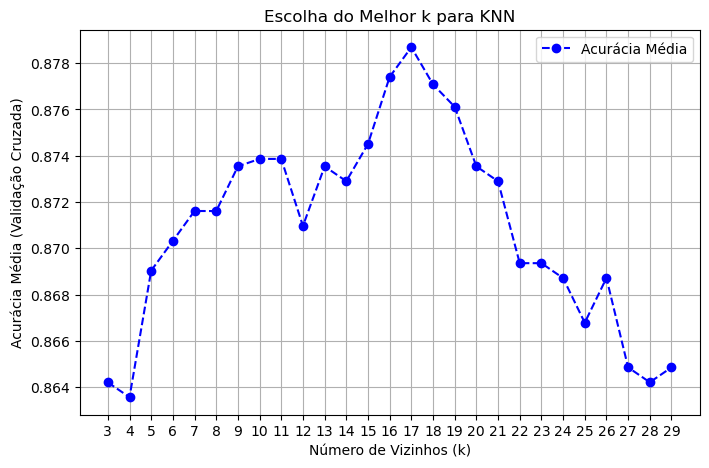

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Testar diferentes valores de k
k_values = range(3, 30)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan',weights='distance' )
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    scores.append(cv_scores.mean())

# Plotando os resultados
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='dashed', color='b', label="Acurácia Média")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia Média (Validação Cruzada)")
plt.title("Escolha do Melhor k para KNN")
plt.xticks(k_values)
plt.legend()
plt.grid()
plt.show()


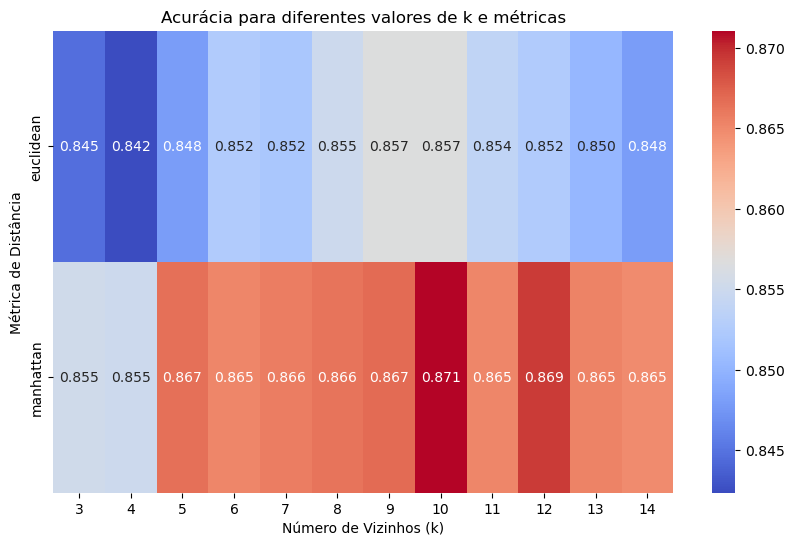

In [6]:
import seaborn as sns
import pandas as pd

# Definir métricas a testar
metrics = ['euclidean', 'manhattan']
results = []

for k in k_values:
    for metric in metrics:
        knn = KNeighborsClassifier(n_neighbors=k, metric=metric)
        cv_scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
        results.append({'k': k, 'metric': metric, 'accuracy': cv_scores.mean()})

# Converter para DataFrame
df_results = pd.DataFrame(results)

# Criar Heatmap
df_pivot = df_results.pivot(index='metric', columns='k', values='accuracy')
plt.figure(figsize=(10, 6))
sns.heatmap(df_pivot, annot=True, cmap="coolwarm", fmt=".3f")
plt.title("Acurácia para diferentes valores de k e métricas")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Métrica de Distância")
plt.show()


Acurácia: 0.89
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88       463
           2       0.84      0.83      0.84       424
           5       0.91      0.96      0.93       446

    accuracy                           0.89      1333
   macro avg       0.88      0.88      0.88      1333
weighted avg       0.88      0.89      0.88      1333



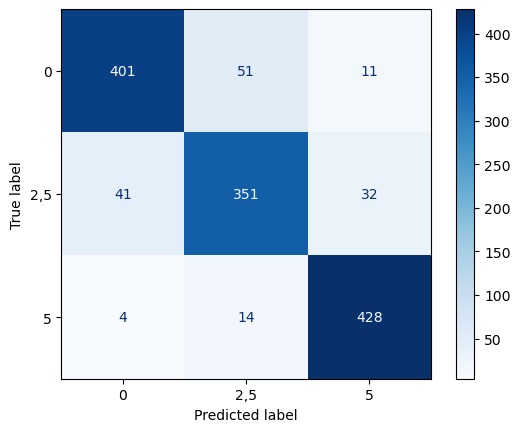

In [6]:
import numpy as np
from scipy.spatial.distance import mahalanobis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from numpy.linalg import inv
from sklearn.metrics import (classification_report, confusion_matrix, ConfusionMatrixDisplay)
import numpy as np
import matplotlib.pyplot as plt

# Calcular a matriz de covariância inversa
cov_matrix = np.cov(X_train, rowvar=False)  # Matriz de covariância
inv_cov_matrix = inv(cov_matrix)  # Inversa da matriz de covariância
metrics = ['euclidean', 'manhattan']
knn = KNeighborsClassifier(n_neighbors=17, metric='manhattan',weights='distance' )
knn.fit(X_train, y_train)

# Fazendo previsões
y_pred = knn.predict(X_test)

# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.2f}")

# Relatório detalhado
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["0", "2,5", "5"])
disp.plot(cmap='Blues')
plt.show()